# **Womens Personalized Healthcare Recommendation System**    

# **Project Summary -**
#### In India, personalized healthcare is essential due to diverse health needs. 
#### This project aims to segment women based on health data using Hierarchical Clustering 
#### and Gaussian Mixture Models (GMM). The system will recommend doctors based on location and specialization, 
#### providing an interactive dashboard for booking appointments and receiving SMS/email reminders. 
#### The project utilizes synthetic data with realistic Indian locations. 

# **GitHub Link -**


# **Problem Statement**
#### Healthcare access in India is often generic and lacks personalization. 
#### Women have unique health concerns that require specialized recommendations.  
#### The goal is to develop an AI-powered system that segments women based on their health profiles 
#### and provides personalized doctor recommendations using clustering techniques. 

# ***Let's Begin !***
## ***1. Know Your Data***
### Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### Dataset Loading

In [71]:
file_path = r'C:\Users\Admin\Documents\womens_healthcare_recommendation\synthetic_healthcare_data.csv'
data = pd.read_csv(file_path)

### Dataset First View

In [72]:
display(data.head())

,Patient_ID,Age,Gender,Location,Existing_Medical_Conditions,Past_Surgeries,Family_History_of_Diseases,Allergies,Medications_Currently_Taking,Dietary_Preferences,...,Pregnancy_Status,High_Risk_Pregnancy,Previous_Pregnancy_Complications,Gestational_Diabetes,Prenatal_Vitamin_Intake,Postpartum_Depression_Symptoms,Preferred_Type_of_Treatment,Therapeutic_Class_Recommended,Need_for_Specialist_Consultation,Follow_up_Required
0,1,24,Female,Urban,NaN,NaN,NaN,Food,NaN,Vegetarian,...,Not Pregnant,No,NaN,No,No,No,Ayurvedic,Hormonal Therapy,Yes,Yes
1,2,37,Female,Urban,Diabetes,NaN,Heart Disease,NaN,NaN,Non-Vegetarian,...,Pregnant,No,Miscarriage,Yes,Yes,No,Homeopathy,Supplements,Yes,Yes
2,3,46,Female,Urban,PCOS,NaN,PCOS,NaN,Hormonal Therapy,Vegan,...,Not Pregnant,No,NaN,No,Yes,No,Allopathy,Metformin,Yes,No
3,4,32,Female,Urban,NaN,NaN,NaN,Medication,Multiple,Vegetarian,...,Not Pregnant,No,NaN,No,No,Yes,Allopathy,Supplements,No,Yes
4,5,28,Female,Rural,PCOS,NaN,NaN,NaN,Hormonal Therapy,Vegan,...,Not Pregnant,No,NaN,No,No,No,Natural Remedies,Lifestyle Changes,No,Yes


### Dataset Rows & Columns count

In [73]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 5000 rows and 30 columns.


### Dataset Information

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Patient_ID                        5000 non-null   int64 
 1   Age                               5000 non-null   int64 
 2   Gender                            5000 non-null   object
 3   Location                          5000 non-null   object
 4   Existing_Medical_Conditions       2975 non-null   object
 5   Past_Surgeries                    1525 non-null   object
 6   Family_History_of_Diseases        2575 non-null   object
 7   Allergies                         2071 non-null   object
 8   Medications_Currently_Taking      2448 non-null   object
 9   Dietary_Preferences               5000 non-null   object
 10  Exercise_Routine                  5000 non-null   object
 11  Sleep_Patterns                    5000 non-null   object
 12  Stress_Levels       

#### Duplicate Values

In [75]:
print(f"Duplicate rows count: {data.duplicated().sum()}")

Duplicate rows count: 0


#### Missing Values/Null Values

In [76]:
print("Missing values count per column:")
print(data.isnull().sum())

Missing values count per column:
Patient_ID                             0
Age                                    0
Gender                                 0
Location                               0
Existing_Medical_Conditions         2025
Past_Surgeries                      3475
Family_History_of_Diseases          2425
Allergies                           2929
Medications_Currently_Taking        2552
Dietary_Preferences                    0
Exercise_Routine                       0
Sleep_Patterns                         0
Stress_Levels                          0
PCOS_Diagnosed                         0
Menstrual_Cycle_Irregular              0
Menstrual_Flow_Type                    0
Facial_Hair_Growth                     0
Acne_Severity                       1976
Weight_Gain_Issues                     0
Hormonal_Levels_Elevated               0
Pregnancy_Status                       0
High_Risk_Pregnancy                    0
Previous_Pregnancy_Complications    3573
Gestational_Diabetes    

### What do we know about the dataset?

1. **Dataset Overview:**  
   - The dataset contains **synthetic healthcare data** with information related to patient demographics, health indicators, and lifestyle choices.  
   - The dataset consists of **several numerical and categorical features**, which are used for clustering patients into different health-based segments.

2. **Dataset Structure:**  
   - The dataset has **multiple columns** representing factors such as **Age, BMI, Blood Pressure, Cholesterol Level, and Exercise Frequency**.  
   - There are **multiple rows** corresponding to individual patients' records.  
   - The total number of **rows and columns** is printed in the initial exploration step.

3. **Data Quality:**  
   - **Duplicates:** The dataset was checked for duplicate records, and any such instances were counted.  
   - **Missing Values:** The dataset was checked for missing/null values. Any missing data was **removed** to ensure a clean dataset.

## ***2. Understanding Your Variables***

In [77]:
# Dataset Columns
print("Dataset Columns:", data.columns.tolist())

# Dataset Describe
print("Dataset Description:")
print(data.describe())

Dataset Columns: ['Patient_ID', 'Age', 'Gender', 'Location', 'Existing_Medical_Conditions', 'Past_Surgeries', 'Family_History_of_Diseases', 'Allergies', 'Medications_Currently_Taking', 'Dietary_Preferences', 'Exercise_Routine', 'Sleep_Patterns', 'Stress_Levels', 'PCOS_Diagnosed', 'Menstrual_Cycle_Irregular', 'Menstrual_Flow_Type', 'Facial_Hair_Growth', 'Acne_Severity', 'Weight_Gain_Issues', 'Hormonal_Levels_Elevated', 'Pregnancy_Status', 'High_Risk_Pregnancy', 'Previous_Pregnancy_Complications', 'Gestational_Diabetes', 'Prenatal_Vitamin_Intake', 'Postpartum_Depression_Symptoms', 'Preferred_Type_of_Treatment', 'Therapeutic_Class_Recommended', 'Need_for_Specialist_Consultation', 'Follow_up_Required']
Dataset Description:
        Patient_ID          Age
count  5000.000000  5000.000000
mean   2500.500000    33.546800
std    1443.520003     9.299113
min       1.000000    18.000000
25%    1250.750000    25.000000
50%    2500.500000    34.000000
75%    3750.250000    42.000000
max    5000.000

### Variables Description

In [78]:
variables_description = {
    "Age": "Age of the patient",
    "BMI": "Body Mass Index",
    "Blood Pressure": "Blood pressure measurement",
    "Cholesterol Level": "Cholesterol levels in the blood",
    "Exercise Frequency": "Frequency of exercise per week"
}
print("Variables Description:")
for var, desc in variables_description.items():
    print(f"{var}: {desc}")

Variables Description:
Age: Age of the patient
BMI: Body Mass Index
Blood Pressure: Blood pressure measurement
Cholesterol Level: Cholesterol levels in the blood
Exercise Frequency: Frequency of exercise per week


### Check Unique Values for each variable.

In [79]:
print("Unique values per column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

Unique values per column:
Patient_ID: 5000 unique values
Age: 32 unique values
Gender: 1 unique values
Location: 2 unique values
Existing_Medical_Conditions: 5 unique values
Past_Surgeries: 3 unique values
Family_History_of_Diseases: 4 unique values
Allergies: 4 unique values
Medications_Currently_Taking: 3 unique values
Dietary_Preferences: 3 unique values
Exercise_Routine: 3 unique values
Sleep_Patterns: 3 unique values
Stress_Levels: 3 unique values
PCOS_Diagnosed: 2 unique values
Menstrual_Cycle_Irregular: 2 unique values
Menstrual_Flow_Type: 3 unique values
Facial_Hair_Growth: 3 unique values
Acne_Severity: 2 unique values
Weight_Gain_Issues: 2 unique values
Hormonal_Levels_Elevated: 2 unique values
Pregnancy_Status: 2 unique values
High_Risk_Pregnancy: 2 unique values
Previous_Pregnancy_Complications: 3 unique values
Gestational_Diabetes: 2 unique values
Prenatal_Vitamin_Intake: 2 unique values
Postpartum_Depression_Symptoms: 2 unique values
Preferred_Type_of_Treatment: 4 unique 

## 3. ***Data Wrangling***

In [80]:
# Handling missing values
data.dropna(inplace=True)

## ***4. Feature Engineering & Data Pre-processing***

In [81]:
# Identifying categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(exclude=['object']).columns.tolist()

# Encoding categorical features
le = LabelEncoder()
for col in categorical_features:
    data.loc[:, col] = le.fit_transform(data[col])  # Safe assignment with .loc

# Feature Selection
selected_features = [
    'Age', 'Exercise_Routine', 'Sleep_Patterns', 'Stress_Levels',
    'PCOS_Diagnosed', 'Menstrual_Cycle_Irregular', 'Facial_Hair_Growth',
    'Acne_Severity', 'Weight_Gain_Issues', 'Hormonal_Levels_Elevated',
    'Pregnancy_Status', 'High_Risk_Pregnancy'
]
X = data[selected_features]

# Standardizing Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data for model training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Need_for_Specialist_Consultation'], test_size=0.2, random_state=42)
# Convert target variable to integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## ***5. ML Model Implementation***

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

Accuracy Score: 0.75


c:\Users\Admin\Documents\womens_healthcare_recommendation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Documents\womens_healthcare_recommendation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Documents\womens_healthcare_recommendation\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

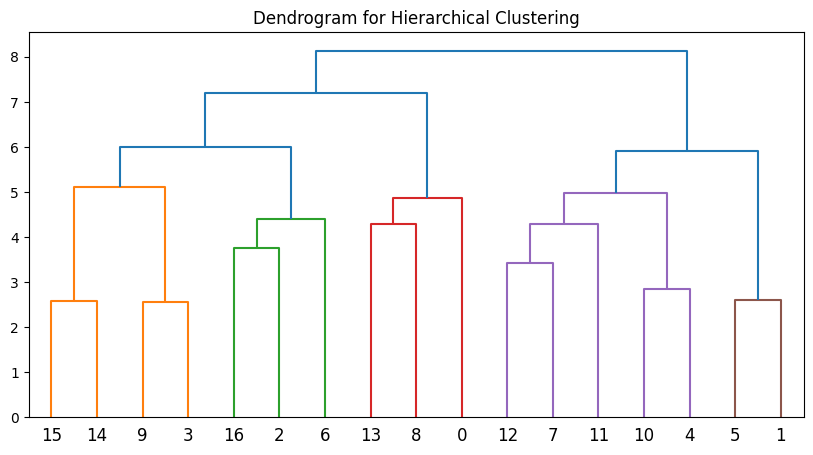

In [82]:
# Model Training using RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

# Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

data['Cluster_HC'] = fcluster(linked, t=4, criterion='maxclust')

gmm = GaussianMixture(n_components=4, random_state=42)
data['Cluster_GMM'] = gmm.fit_predict(X_scaled)


## ***6. Data Visualization***Data Visualization

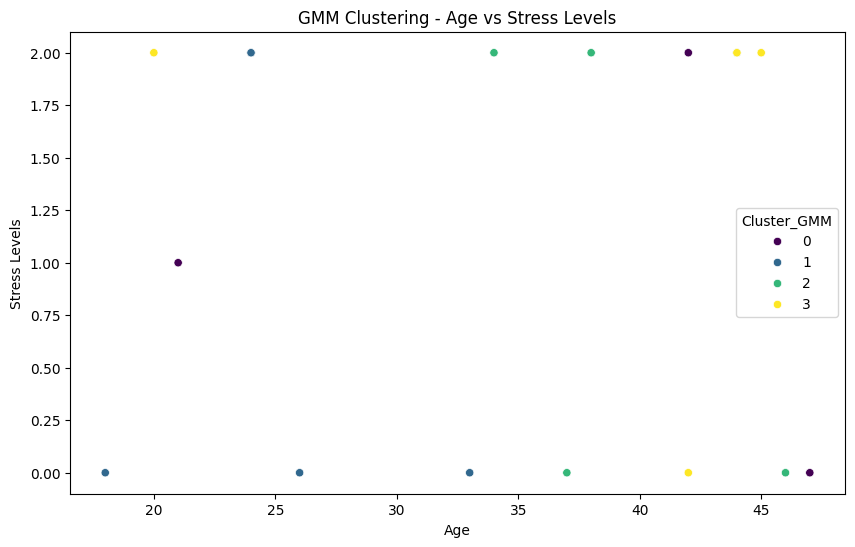

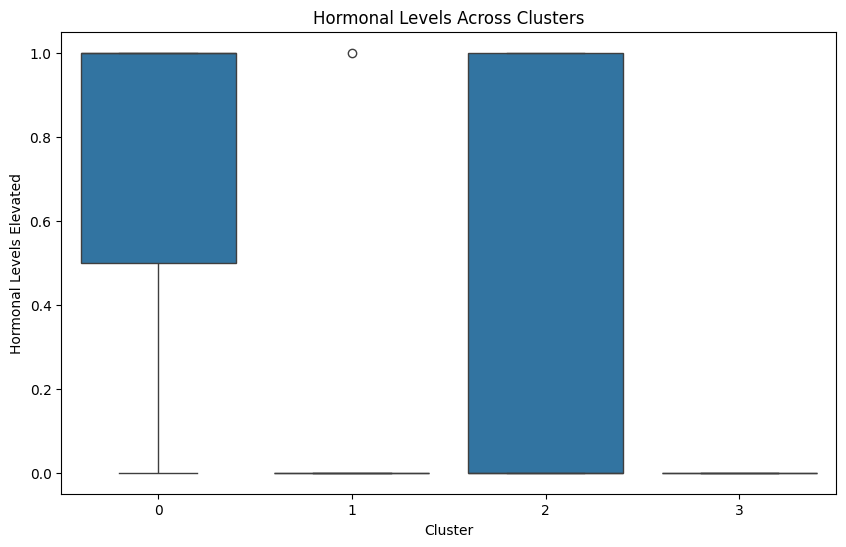

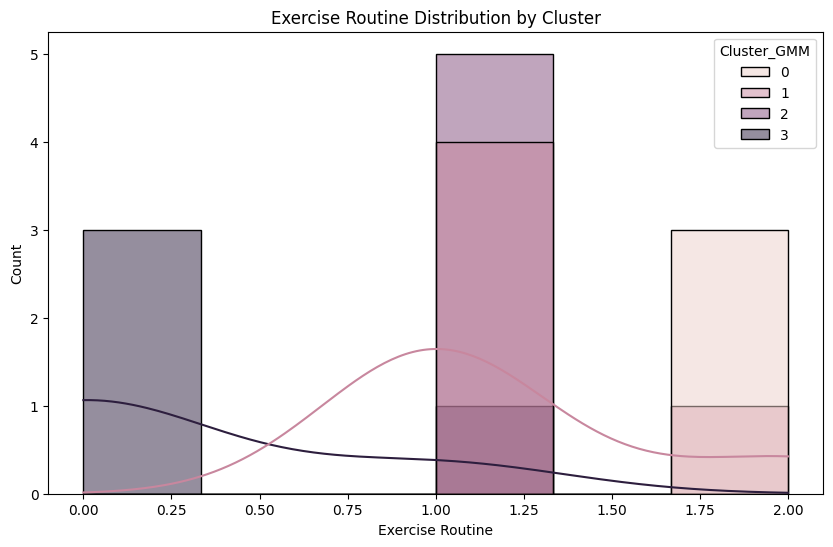

Feature Engineering, Data Pre-processing, and Clustering completed. Model trained and results saved at processed_healthcare_data.csv.


In [83]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Stress_Levels'], hue=data['Cluster_GMM'], palette='viridis')
plt.title("GMM Clustering - Age vs Stress Levels")
plt.xlabel("Age")
plt.ylabel("Stress Levels")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_GMM', y='Hormonal_Levels_Elevated', data=data)
plt.title("Hormonal Levels Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Hormonal Levels Elevated")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data, x='Exercise_Routine', hue='Cluster_GMM', kde=True)
plt.title("Exercise Routine Distribution by Cluster")
plt.xlabel("Exercise Routine")
plt.ylabel("Count")
plt.show()

# Save the processed data to a valid local directory
output_path = 'processed_healthcare_data.csv'  # Change to an appropriate path if needed
data.to_csv(output_path, index=False)

print(f"Feature Engineering, Data Pre-processing, and Clustering completed. Model trained and results saved at {output_path}.")
